# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [74]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Mike\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
df = clean_hospital_read_df

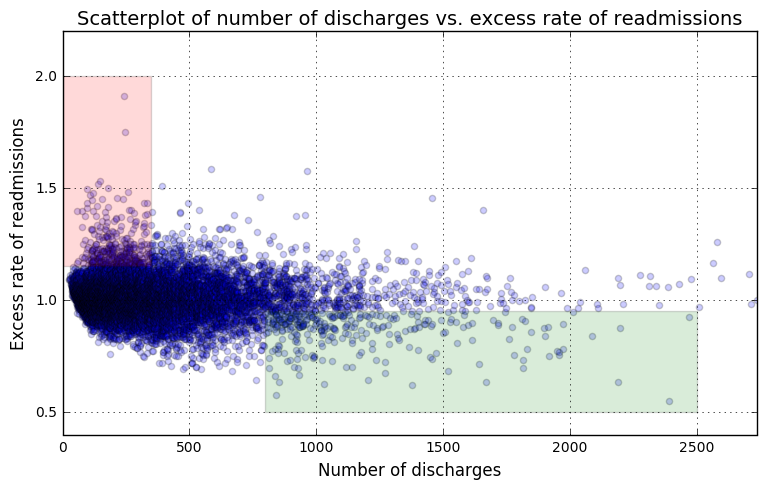

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations?

I have 3 main problems with the above analysis and recommendations.

1. The scatter plot is inconclusive by itself. The point it is trying to make is unclear.

2. The jump from saying hospitals with fewer patients have a higher readmission rate, to saying that these smaller hospitals need to pay more per patient, is quite a leap of logic. That idea is not based on the data at all. 

3. The most glaring weakness here though is that the analyst states there is a 'significant correlation' between hospital size and readmission rate, without actually showing the correlation. Just stating the mean and a percentage does not prove anything statistically. 

In my analysis below I will try to prove or disprove the 'significant correlation' between hospital size and readmission rate to an alpha level of .01. 



### B-1. Hypothesis Test:

The analysis implies that the correlation they are talking about is for hospitals with less than 100 discharges, so that's what I will look at.

**Null hypothesis:** Mean readmission rate for smaller (less than 100 discharges) hospitals **=** Mean readmission rate for bigger (more than 100 discharges) hospitals

**Alternative hypothesis:** Mean readmission rate for smaller (less than 100 discharges) hospitals **>** Mean readmission rate for bigger (more than 100 discharges) hospitals

**Alpha Level:** .01

### B-2. Compute and report the observed significance value (or p-value).

A two-sample z-test for comparing two means will be the test used. 

In [84]:
# take only relevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# drop NaN rows
df = df.dropna()

In [64]:
small_df = df.loc[df['Number of Discharges'] < 100]
len_small = len(small_df)
print(len_small)

1188


In [63]:
big_df = df.loc[df['Number of Discharges'] > 1000]
len_big = len(big_df)
print(len_big)

463


In [55]:
print('Mean Excess Readmission Ratio for small hospitals: %.3f' % small_df['Excess Readmission Ratio'].mean())
print('Std Error for small hospitals Excess Readmission Ratio: %.3f' % small_df['Excess Readmission Ratio'].std())

Mean Excess Readmission Ratio for small hospitals: 1.023
Std Error for small hospitals Excess Readmission Ratio: 0.058


In [56]:
print('Mean Excess Readmission Ratio for bigger hospitals: %.3f' % big_df['Excess Readmission Ratio'].mean())
print('Std Error for bigger hospitals Excess Readmission Ratio: %.3f' % big_df['Excess Readmission Ratio'].std())

Mean Excess Readmission Ratio for bigger hospitals: 0.978
Std Error for bigger hospitals Excess Readmission Ratio: 0.120


In [71]:
# calculate z-score
mean_small = small_df['Excess Readmission Ratio'].mean()
std_small = small_df['Excess Readmission Ratio'].std()

mean_big = big_df['Excess Readmission Ratio'].mean()
std_big = big_df['Excess Readmission Ratio'].std()

# 0 comes from the null hypothesis, we are expecting no difference
z_numerator = (mean_small - mean_big - 0)

z_denominator = np.sqrt((std_small / len_small) + (std_big / len_big))

z_score = z_numerator / z_denominator

print('z-score: %.3f' % z_score)

z-score: 2.523


### B-3. Report statistical significance for α = .01. 

An alpha of .01 corresponds to a z-score of 2.575. The calculated z-score found in the previous step is smaller at 2.523. This means that we cannot reject the null hypothesis. Said another way, there is not a statistically significant correlation between hospital size and readmission rates at an alpha level of .01.

### B-4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance is what I discussed above. This means that statistically, the observed difference in means (in our case here) is not likely to have occured by chance at the alpha level proposed. 

Practical significance is different. This is being aware of differences in the data that might not meet statistical significance levels but could still have real-world implications.

My recommendation to the client in the example above would be to further investigate the observed difference. There is obviously **something** going on there that warrants further checking into. I still do not agree with calling the difference 'statistically significant' in the original report (as it clearly is not), and pulling in resources spent per patient is somewhat crazy. There is nothing in this dataset regarding that at all, and implying that there is, is very, very misleading. 

### B-5. Create a different visualization to that shows the relationship in a more direct manner.

The advantages of choosing the scatter plot above is that it shows all datapoints, and a very general trend is evident.

The disadvantages are that the trend (in this example at least) is not real clear, not very pronounced in the data. It is also very 'muddy', the datapoints clutter each other up.

Overall, it is not a successful visualization. Instead, I will use a regression line plotted with the data. The actual correlation between the variables is small, this is what the original scatter plot did not illustrate clearly. Adding a regression line will show the relationship.

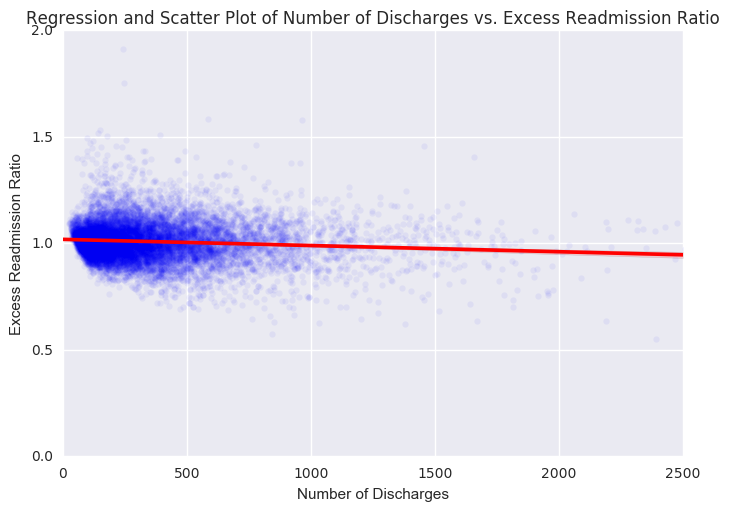

In [107]:
# create regression line for the scatter plot
f, ax = plt.subplots()
ax.set(xlim=(0,2500), ylim=(0,2))
ax.set_title('Regression and Scatter Plot of Number of Discharges vs. Excess Readmission Ratio')
sns.regplot(x=df['Number of Discharges'], 
            y=df['Excess Readmission Ratio'],
            data=df,
            line_kws={'color':'red'},
            scatter_kws={'color':'blue', 'alpha':0.055})